Kita mempunyai toko di mall, dan melalui kartu membership kita memiliki memiliki beberapa data tentang pelanggan kita seperti ID Customer, usia, jenis kelamin, pendapatan tahunan, dan pengeluaran.
Pengeluaran adalah sesuatu yang akan kita tetapkan kepada pelanggan berdasarkan parameter yang kita tetapkan seperti perilaku pelanggan dan data pembelian.

Pernyataan masalah
kita pemilik toko di mall, ingin memahami pelanggan kita dengan kebiasaan pelangan dalam berbelanja [Target Pelanggan] sehingga pemahaman kita terhadap pelanggan dapat diberikan kepada tim marketing dan merencanakan strategi yang sesuai.

In [1]:
import pandas as pd 
import numpy as np #linear algebra
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv ('/content/Mall_Customers(isnull)1.csv')

In [3]:
df

,CustomerID,Kelamin,Umur,Pendapatan (Juta Rp),Rating Pengeluaran (1-100)
0,1,Male,19.0,15,39
1,2,Male,21.0,15,81
2,3,Female,20.0,16,6
3,4,Female,23.0,16,77
4,5,Female,31.0,17,40
...,...,...,...,...,...
195,196,Female,35.0,120,79
196,197,Female,45.0,126,28
197,198,Male,32.0,126,74
198,199,Male,32.0,137,18


In [4]:
df.columns

Index(['CustomerID', 'Kelamin', 'Umur', 'Pendapatan (Juta Rp)',
       'Rating Pengeluaran (1-100)'],
      dtype='object')

In [5]:
df.describe()

,CustomerID,Umur,Pendapatan (Juta Rp),Rating Pengeluaran (1-100)
count,200.000000,178.000000,200.000000,200.000000
mean,100.500000,38.449438,60.560000,50.200000
std,57.879185,13.565502,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,29.000000,41.500000,34.750000
50%,100.500000,35.500000,61.500000,50.000000
75%,150.250000,48.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.info() #cek apakah ada missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CustomerID                  200 non-null    int64  
 1   Kelamin                     200 non-null    object 
 2   Umur                        178 non-null    float64
 3   Pendapatan (Juta Rp)        200 non-null    int64  
 4   Rating Pengeluaran (1-100)  200 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 7.9+ KB


In [7]:
rata_umur = df['Umur'].mean() #mengisi missing value 'age' dengan nilai mean 
df['Umur'].fillna(rata_umur, inplace=True)

df.isna().sum()

CustomerID                    0
Kelamin                       0
Umur                          0
Pendapatan (Juta Rp)          0
Rating Pengeluaran (1-100)    0
dtype: int64

In [8]:
df.head()

,CustomerID,Kelamin,Umur,Pendapatan (Juta Rp),Rating Pengeluaran (1-100)
0,1,Male,19.0,15,39
1,2,Male,21.0,15,81
2,3,Female,20.0,16,6
3,4,Female,23.0,16,77
4,5,Female,31.0,17,40


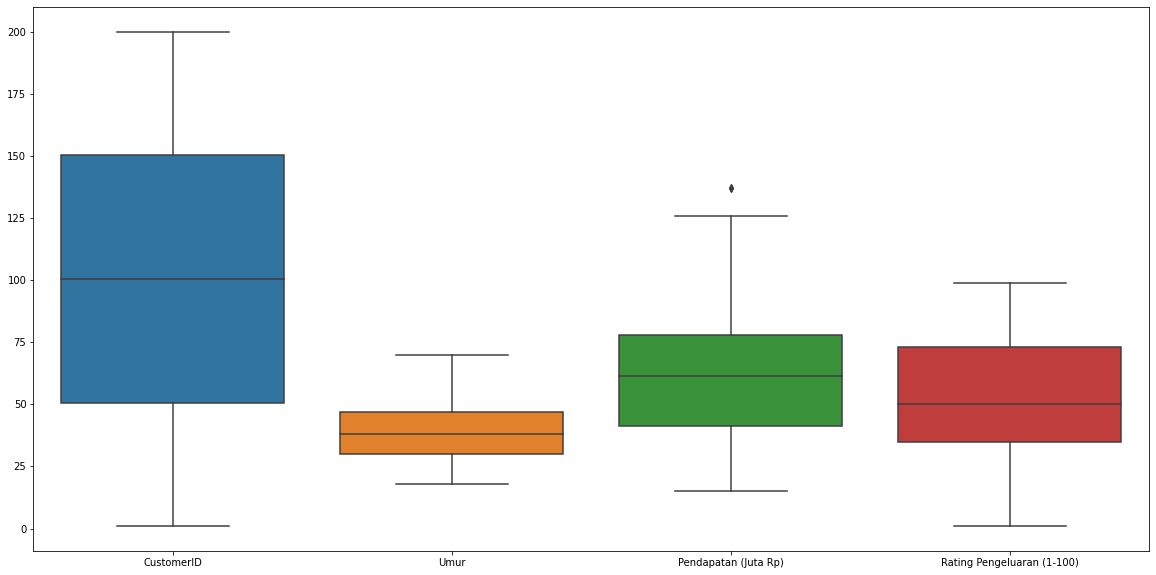

In [9]:
# cek outlier kita
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(data=df)

dilihat dari grafik diatas terdapat outlier pada Pendapatan, tetapi kita tidak akan buang outliernya karena dari data pendapatan itu akan kita analisis juga

Selanjutnya kita juga akan mengecek korelasi

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


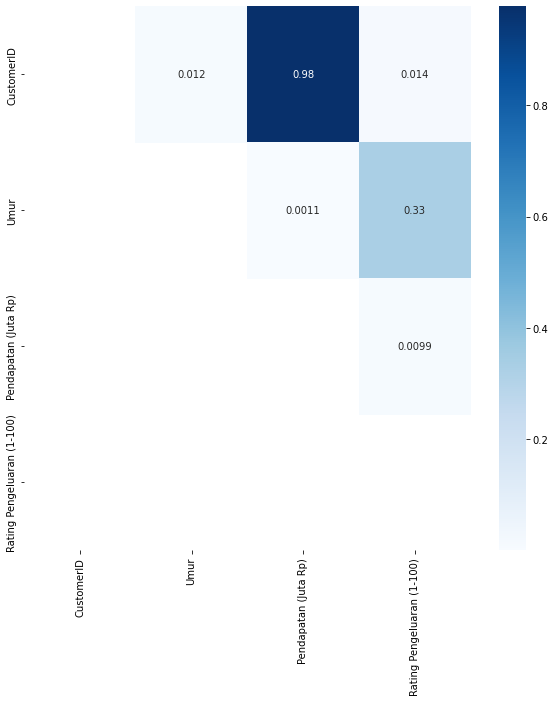

In [10]:
# Cek Korelasi antara kolom di data kita
# korelasi mengecek nilai diatas 0.75 atau min 0.75
corr_matrix = df.corr().abs()


upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

plt.figure(figsize=(10,10))
sns.heatmap(upper, annot=True, cmap='Blues')

Karena customerID dan juga pendapatan mempunyai korelasi yang kuat diatas 0.75 maka kita akan drop/buang salah satu kolom dan yang akan kita buang adalah kolom CustomerID, dikarenakan CustomerID hanyalah kolom unique saja dan tidak terlalu penting untuk kita analisis

In [11]:
df.drop('CustomerID', axis=1, inplace=True)

In [12]:
df.describe()

,Umur,Pendapatan (Juta Rp),Rating Pengeluaran (1-100)
count,200.000000,200.000000,200.000000
mean,38.449438,60.560000,50.200000
std,12.793694,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,30.000000,41.500000,34.750000
50%,38.000000,61.500000,50.000000
75%,47.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


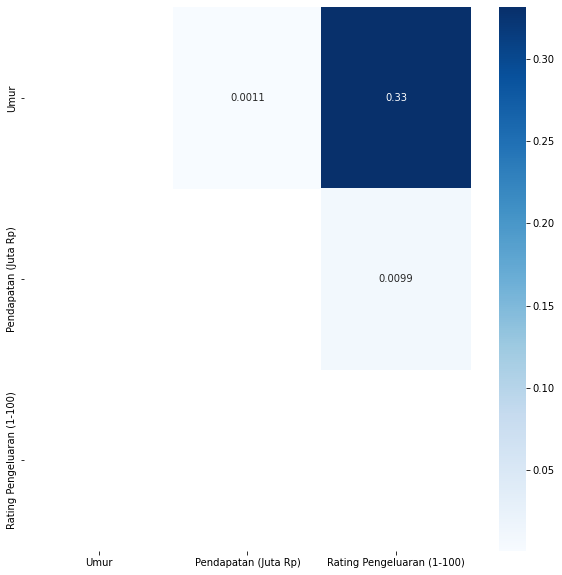

In [13]:
# cek korelasi lagi
corr_matrix = df.corr().abs()


upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

plt.figure(figsize=(10,10))
sns.heatmap(upper, annot=True, cmap='Blues')

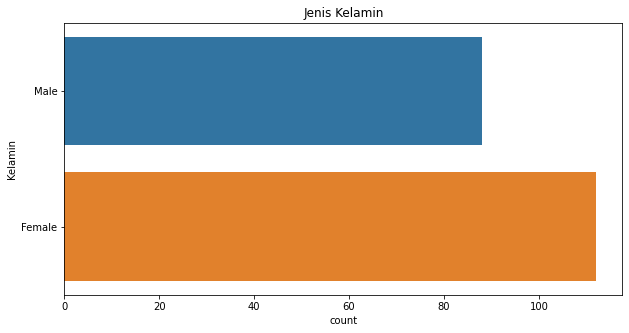

In [14]:
plt.figure(1 , figsize = (10 , 5))
sns.countplot(y = 'Kelamin' , data = df)
plt.title('Jenis Kelamin')
plt.show()

Kita bisa melihat dari grafik diatas bahwa data yang kita dapat, perempuan memiliki jenis kelamin yang paling banyak 

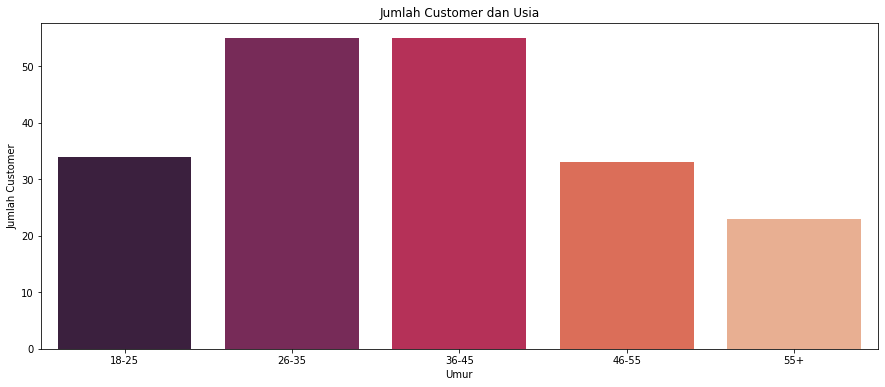

In [15]:
age18_25 = df.Umur[(df.Umur <= 25) & (df.Umur >= 18)]
age26_35 = df.Umur[(df.Umur <= 35) & (df.Umur >= 26)]
age36_45 = df.Umur[(df.Umur <= 45) & (df.Umur >= 36)]
age46_55 = df.Umur[(df.Umur <= 55) & (df.Umur >= 46)]
age55above = df.Umur[df.Umur >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Jumlah Customer dan Usia")
plt.xlabel("Umur")
plt.ylabel("Jumlah Customer")
plt.show()

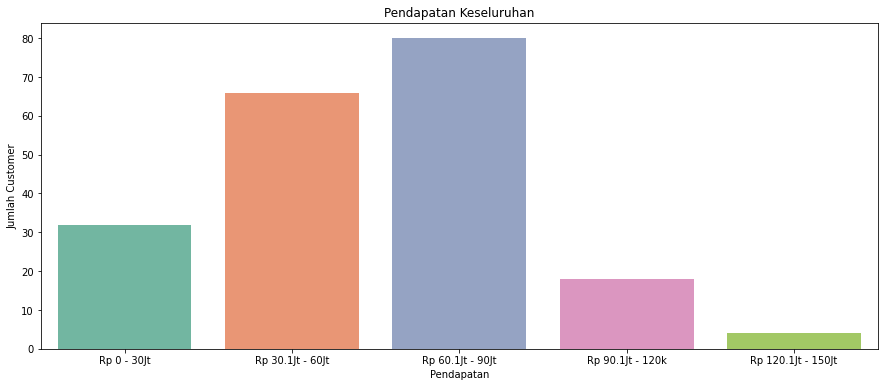

In [16]:
ai0_30 = df["Pendapatan (Juta Rp)"][(df["Pendapatan (Juta Rp)"] >= 0) & (df["Pendapatan (Juta Rp)"] <= 30)]
ai31_60 = df["Pendapatan (Juta Rp)"][(df["Pendapatan (Juta Rp)"] >= 31) & (df["Pendapatan (Juta Rp)"] <= 60)]
ai61_90 = df["Pendapatan (Juta Rp)"][(df["Pendapatan (Juta Rp)"] >= 61) & (df["Pendapatan (Juta Rp)"] <= 90)]
ai91_120 = df["Pendapatan (Juta Rp)"][(df["Pendapatan (Juta Rp)"] >= 91) & (df["Pendapatan (Juta Rp)"] <= 120)]
ai121_150 = df["Pendapatan (Juta Rp)"][(df["Pendapatan (Juta Rp)"] >= 121) & (df["Pendapatan (Juta Rp)"] <= 150)]

aix = ["Rp 0 - 30Jt", "Rp 30.1Jt - 60Jt", "Rp 60.1Jt - 90Jt", "Rp 90.1Jt - 120k", "Rp 120.1Jt - 150Jt"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Pendapatan Keseluruhan")
plt.xlabel("Pendapatan")
plt.ylabel("Jumlah Customer")
plt.show()

In [26]:
df.head()

,Kelamin,Umur,Pendapatan (Juta Rp),Rating Pengeluaran (1-100),kelamin
0,1,19.0,15,39,1
1,1,21.0,15,81,1
2,0,20.0,16,6,0
3,0,23.0,16,77,0
4,0,31.0,17,40,0


## Data Preparation

Membangun Cluster yang representatif


### 3.2 K-Means

* Dalam tahap awal kita akan menentukan initial `k`, dimana kita akan coba membuat cluster dengan nilai `k=5`.

* *Notes*. Durasi pelatihan model akan berbanding lurus dengan banyaknya data dan jumlah cluster (`k`) yang ditentukan

In [27]:
X = df.iloc[:, [1,2,3]].values

In [28]:
K = 5 #data kita latih
kmeans_5 = KMeans(n_clusters=K, random_state=11) # memanggil model kmeans dengan setting n_cluster sejumlah k

start = time()
kmeans_5.fit(X) #generate model fit()
print(f"Done fitting kMeans in {time()-start:.3f}s")

Done fitting kMeans in 0.191s


In [29]:
K = 15
kmeans_15 = KMeans(n_clusters=K, random_state=11)

start = time()
kmeans_15.fit(X)
print(f"Done fitting kMeans in {time()-start:.3f}s")

Done fitting kMeans in 0.170s


* Setelah selesai dilatih, kita akan coba membuat kolom baru `clusters_of_5`, `cluster_of_15` pada data `df`, yang merepresentasikan cluster dari model-model tersebut, untuk selanjutnya dicari nilai _cardinality_

In [30]:
X = df.assign(
    clusters_of_5=kmeans_5.predict(X),
    clusters_of_15=kmeans_15.predict(X)
)

with pd.option_context("display.max_columns", None):
    display(X.head())

,Kelamin,Umur,Pendapatan (Juta Rp),Rating Pengeluaran (1-100),kelamin,clusters_of_5,clusters_of_15
0,1,19.0,15,39,1,4,0
1,1,21.0,15,81,1,0,3
2,0,20.0,16,6,0,4,0
3,0,23.0,16,77,0,0,3
4,0,31.0,17,40,0,4,0


## 4. Model Evaluation

Pada tahap evaluasi model, kita akan coba menganalisis _cardinality_ 

###  Cluster Cardinality

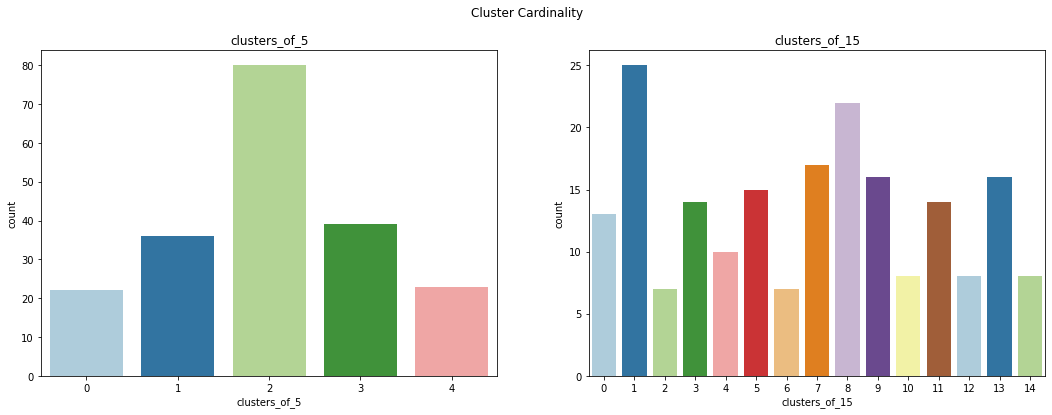

In [31]:
fig, axis = plt.subplots(1, 2, figsize=(18, 6))
for ax, preds in zip(axis, ["clusters_of_5", "clusters_of_15"]):
    sns.countplot(x=preds, data=X, ax=ax, palette="Paired")
    ax.set_title(preds)
plt.suptitle("Cluster Cardinality")
plt.show()

Dari visualisasi _cluster cardinality_ di atas:
* Model dengan 5 cluster (k=5), terlihat bahwa terdapat perbedaan cukup jauh antara cluster `2` dengan cluster lainnya tetapi tidak ekstrim
* Model dengan 15 cluster (k=15), terlihat kardinalitas cluster `1` lebih banyak dibandingkan dengan cluster yang lain.

## Clustering Umur dan Pendapatan

### 4.3 Elbow Method

Untuk menggunakan elbow method, kita perlu menghitung **inertia** dari seluruh cluster.

> **inertia** adalah jumlah kuadrat jarak sampel ke pusat cluster terdekat ([ref](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html))

Kita akan mencoba beberapa nilai `k` (jumlah cluster) untuk dihitung nilai inertia-nya. Kemudian, kita akan buat visualisasi tren nilai inertia untuk masing-masing nilai `k`. **Jumlah cluster yang optimal ditentukan secara visual dengan mencari bentuk siku _elbow_ pada plot setelah inertia mulai menurun secara linier**. ([ref](https://towardsdatascience.com/common-mistakes-in-cluster-analysis-and-how-to-avoid-them-eb960116d773))

In [37]:
X = df[['Umur','Pendapatan (Juta Rp)']].values

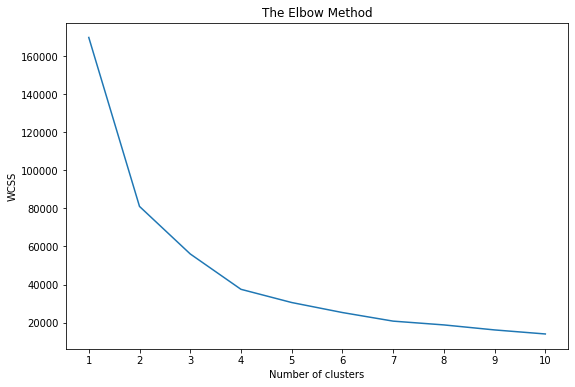

In [38]:
# finding optimum number of clusters
wcss_list = [] #mempersiapkan perhitungan wcss

for i in range(1,11): #perintah looping
    kmeans_test = KMeans(n_clusters = i, init ='k-means++', random_state=88) #n_clusters jumlah kluster,init yang merupakan pemilihan jumlah K di awal (kali ini kita gunakan K++, agar tidak terkena jebakan centroid, random state memiliki kesempatan yg berbeda
    kmeans_test.fit(X) #perintah agar objek kmeans di line sebelumnya, digunakan untuk mengolah data X.
    wcss_list.append(kmeans_test.inertia_) #menghitung WCSS dengan menuliskan perintah append setelah wcss.

plt.figure(figsize=(9,6))
plt.plot(range(1, 11), wcss_list)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(1,11))
plt.ylabel('WCSS')
plt.show()

Dapat Dilihat bahwa K optimum berada di k=2

In [39]:
# KMeans
kmeans = KMeans(n_clusters = 2, init ='k-means++', random_state=88)
y_kmeans = kmeans.fit_predict(X) #prediksi pengelompokan cluster

#untuk unsupervised learning kita gunakan "fit_predict()" untuk supervised learning we use "fit_tranform()"
#y_kmeans is the final model.

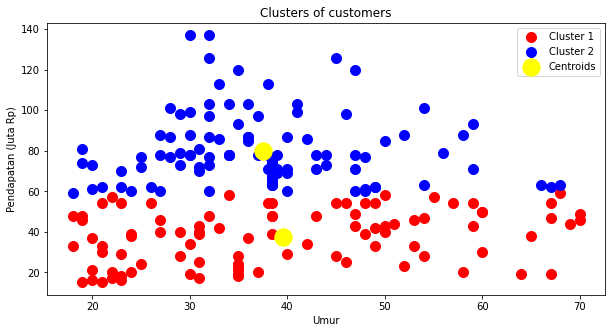

In [44]:
#Visualizing all the clusters 
plt.figure(1 , figsize = (10 ,5))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Umur')
plt.ylabel('Pendapatan (Juta Rp)')
plt.legend()
plt.show()

dari grafik di atas cluster 2 memiliki pendapatan 60-140 juta dengan umur yang beragam

### Clustering Umur dan Rating Pengeluaran (1-100)

In [45]:
X = df[['Umur','Rating Pengeluaran (1-100)']].values

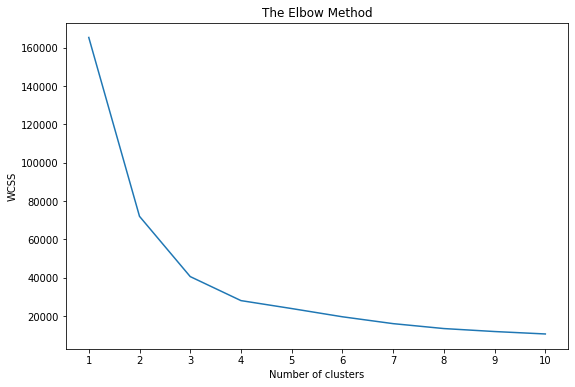

In [46]:
# finding optimum number of clusters
wcss_list = []

for i in range(1,11):
    kmeans_test = KMeans(n_clusters = i, init ='k-means++', random_state=88)
    kmeans_test.fit(X)
    wcss_list.append(kmeans_test.inertia_)

plt.figure(figsize=(9,6))
plt.plot(range(1, 11), wcss_list)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(1,11))
plt.ylabel('WCSS')
plt.show()

In [47]:
# KMeans
kmeans = KMeans(n_clusters = 4, init ='k-means++', random_state=88)
y_kmeans = kmeans.fit_predict(X)

#untuk unsupervised learning kita gunakan "fit_predict()" untuk supervised learning we use "fit_tranform()"
#y_kmeans is the final model.

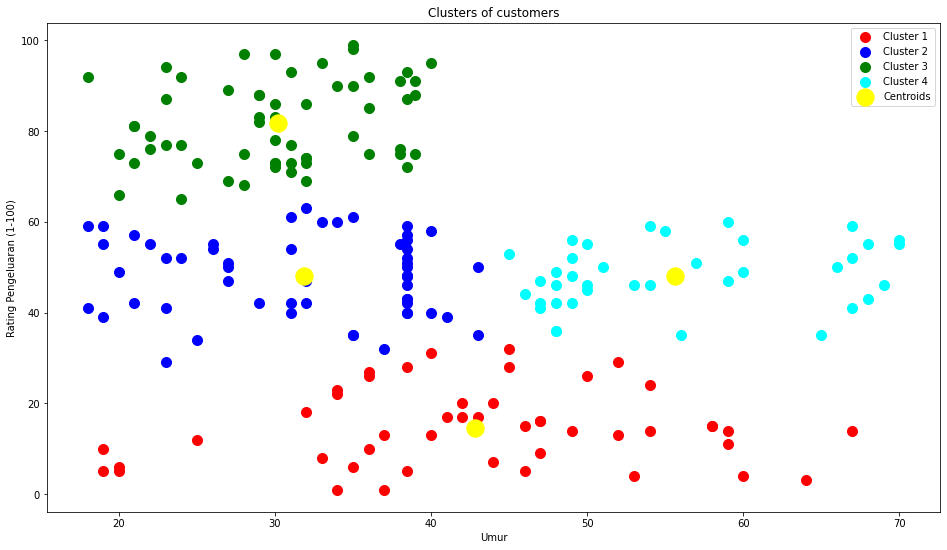

In [48]:
#Visualizing all the clusters 
plt.figure(1 , figsize = (16 ,9))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Umur')
plt.ylabel('Rating Pengeluaran (1-100)')
plt.legend()
plt.show()

Kita lihat orang orang dengan umur 20-40 dari grafik diatas, memiliki kebiasa membeli / berbelanja yang cukup tinggi, kita bisa membuat dan kita bisa lebih spesifikan target audiens kita

membuat diskon khusus untuk pelanggan berusia 20-40 dapat meningkatkan keuntungan toko kita.

CLUSTERING ANNUAL INCOME DAN SPENDING SCORE

In [ ]:
X = df[['Pendapatan (Juta Rp)','Rating Pengeluaran (1-100)']].values

In [ ]:
#Building the Model
#KMeans Algorithm to decide the optimum cluster number , KMeans++ using Elbow Mmethod
#to figure out K for KMeans, I will use ELBOW Method on KMEANS++ Calculation
from sklearn.cluster import KMeans
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=88)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    #inertia_ is the formula used to segregate the data points into clusters

In [ ]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.figure(figsize=(10,5))
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
#bisa kita lihat elbow terakhir berada di k=5


#Model Build
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

#untuk unsupervised learning kita gunakan "fit_predict()" untuk supervised learning we use "fit_tranform()"
#y_kmeans is the final model.

In [ ]:
#Visualizing all the clusters 
plt.figure(figsize=(10,5))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Pendapatan (Juta Rp)')
plt.ylabel('Rating Pengeluaran (1-100)')
plt.legend()
plt.show()

## Model Interpretation 
Cluster 1 (Red Color) -> earning high but spending less

cluster 2 (Blue Colr) -> average in terms of earning and spending 

cluster 3 (Green Color) -> earning high and also spending high [TARGET SET]

cluster 4 (cyan Color) -> earning less but spending more [TARGET SET]

Cluster 5 (magenta Color) -> Earning less , spending less

Salah satu dari dua wilayah yang ditampilkan dapat dipilih sebagai target pelanggan. bisa dilihat grafik di atas untuk cluster 3 dan 4 mereka memiliki spending score yang cukup tinggi, jadi jika kita ingin membuat toko menjadi perbelanjaan yang menarik kita bisa memilih target pelanggan dari dua wilayah di atas, kita akan mendapatkan lebih banyak untung yang bisa didapat.

kita bisa targetkan market kita berada di cluster 3 dan cluster 4 yaitu earning high also spending more, dan earning less but spending more, dan juga membuat sebuah kampanye khusus untuk umur 20 hingga 40, karena dilihat dari grafik clustering 'Umur' dan 'Pengeluaran' umur tersebut memiliki skor pengeluaran yang tinggi.


